In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Constants
tau = 10 # ms
Vm = -65 # mV
theta = -55 # mV
V = -65 # mV

# Input strength
RI = 100 # mV

# Simulate for 40 s, time step 0.1
dt = 0.1
ts = np.arange(0, 40, dt)
Vs = np.zeros_like(ts)
RIs = np.zeros_like(ts)
APs = []

tmp_t = -1

# Set input at given ts
inputs = [10, 20, 22, 24, 26, 26.5, 28, 29, 29.4]
durations = [.2, .2, .2, .2, .2, .2, .2, .2, .2]

# Construct signal
input_signal = np.zeros_like(ts)

for i,d in zip(inputs, durations):
    input_signal[(ts >= i) & (ts <= i+d)] = RI


######################
### Start simulation
#######################
for i, t in enumerate(ts):
    # Get input signal at time point t
    RI_ = input_signal[i]
    
    # Check if action potential is elicited    
    s = V > theta

    # If so, set tmp_t to current time point for refractive period
    # Reset membrane voltage
    # Add Action Potential to list    
    if s:
        tmp_t = t
        V = Vm
        APs.append(t)
        
    # If refractive period is over,
    # integrate with current input signal
    if (t-tmp_t) > .5:
           V = V-dt/tau * ((V - Vm) - RI_)
            
    # Store voltage and input signal
    Vs[i] = V
    RIs[i] = RI

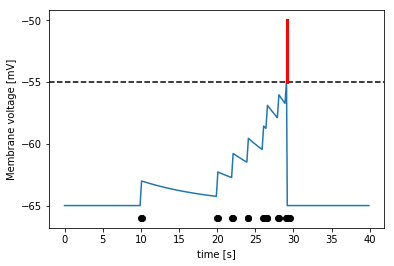

In [ ]:
def showSimulation(plot_input_signal=True):
    plt.figure(figsize=(6,4))
    # Plot voltage
    plt.plot(ts, Vs)

    if plot_input_signal:
        # Plot input signal
        x = np.argwhere(input_signal)
        plt.plot(ts[x], np.ones(x.size)-2+Vm, 'ko')

    # Plot threshold
    plt.axhline(theta, ls="--", c='k')

    # Plot APs
    for ap in APs:
        plt.plot([ap, ap],[theta, theta+5], c='r', lw=3)

    plt.yticks([-65, -60, -55, -50])
    plt.ylabel("Membrane voltage [mV]")
    plt.xlabel("time [s]")
    
showSimulation()

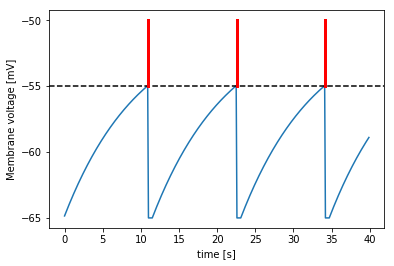

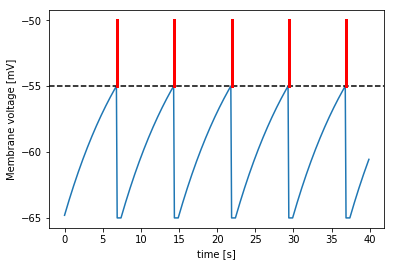

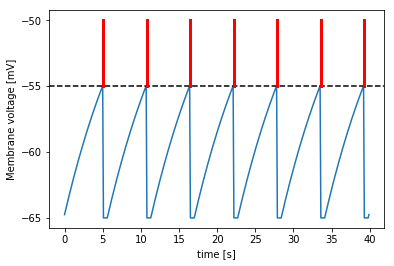

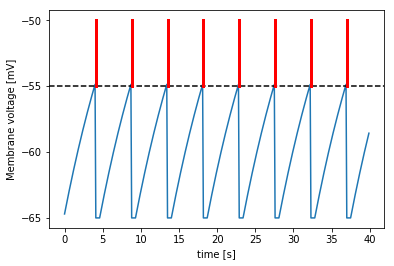

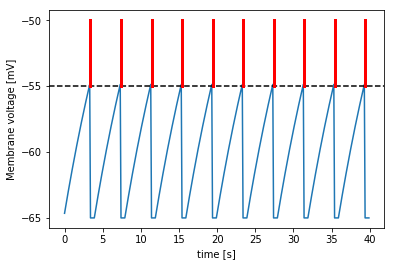

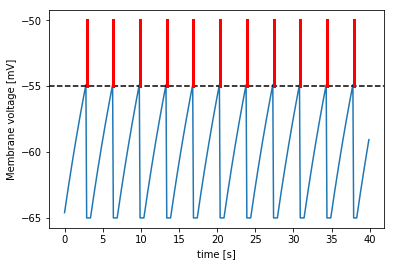

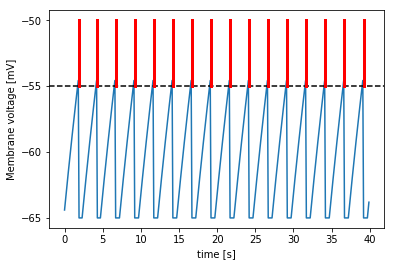

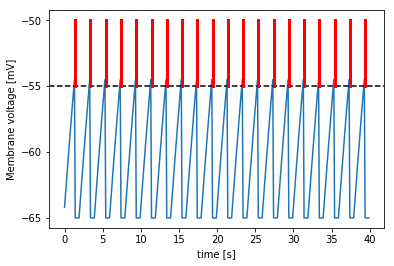

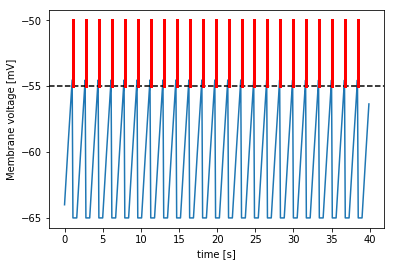

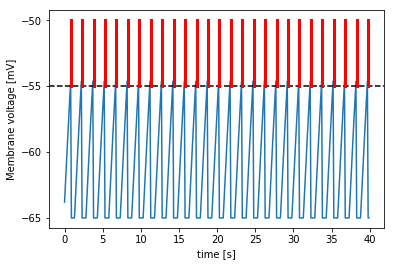

In [ ]:
freqs = []

for RI_ in [15, 20, 25, 30, 35, 40, 60, 80, 100, 120]:
    # Constants
    tau = 10 # ms
    Vm = -65 # mV
    theta = -55 # mV
    V = -65 # mV

    # Simulate for 40 s, time step 0.1
    dt = 0.1
    ts = np.arange(0, 40, dt)
    Vs = np.zeros_like(ts)
    RIs = np.zeros_like(ts)
    APs = []

    tmp_t = -1


    # Construct signal
    input_signal = np.zeros_like(ts)

    for i,d in zip(inputs, durations):
        input_signal[(ts >= i) & (ts <= i+d)] = RI

    ######################
    ### Start simulation
    #######################
    for i, t in enumerate(ts):
        # Check if action potential is elicited    
        s = V > theta

        # If so, set tmp_t to current time point for refractive period
        # Reset membrane voltage
        # Add Action Potential to list    
        if s:
            tmp_t = t
            V = Vm
            APs.append(t)

        # If refractive period is over,
        # integrate with current input signal
        if (t-tmp_t) > .5:
               V = V-dt/tau * ((V - Vm) - RI_)

        # Store voltage and input signal
        Vs[i] = V
        RIs[i] = RI
        
    showSimulation(False)
    
        
    freqs.append(1/np.mean(np.diff(APs)))

Text(0.5,0,'Constant input signal [mV]')

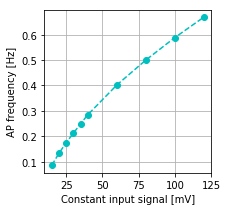

In [ ]:
plt.figure(figsize=(3,3))
plt.grid(True)
plt.plot([15, 20, 25, 30, 35, 40, 60, 80, 100, 120], freqs, 'co--')
plt.ylabel("AP frequency [Hz]")
plt.xlabel("Constant input signal [mV]")

Python code adapted from Trappenberg, Fundamentals of Computational Neuroscience